In [ ]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 51.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c778b7e69bfe3f7c10a6d8c7ba338752ff8b6f218ee4d2017a64f2be95587cb7
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
import numpy as np

x = [25, 60, 71, 73, 75, 79, 81, 85, 101, 103, 110, 120]
q0, q25, q50, q75, q100 = np.percentile(x, q = [0, 25, 50, 75, 100], method = 'midpoint')

print(f"  0パーセンタイル = {q0}")
print(f" 25パーセンタイル(第１四分位数) = {q25}")
print(f' 50パーセンタイル(第２四分位数) = {q50}')
print(f" 75パーセンタイル(第３四分位数) = {q75}")
print(f"100パーセンタイル = {q100}")

# 四分位範囲
iqr = q75 - q25
# 下限
lower_fence = q25 - 1.5 * iqr
# 上限
upper_fence = q75 + 1.5 * iqr

print(f"下限 = {lower_fence}")
print(f"上限 = {upper_fence}")

  0パーセンタイル = 25.0
 25パーセンタイル(第１四分位数) = 72.0
 50パーセンタイル(第２四分位数) = 80.0
 75パーセンタイル(第３四分位数) = 102.0
100パーセンタイル = 120.0
下限 = 27.0
上限 = 147.0


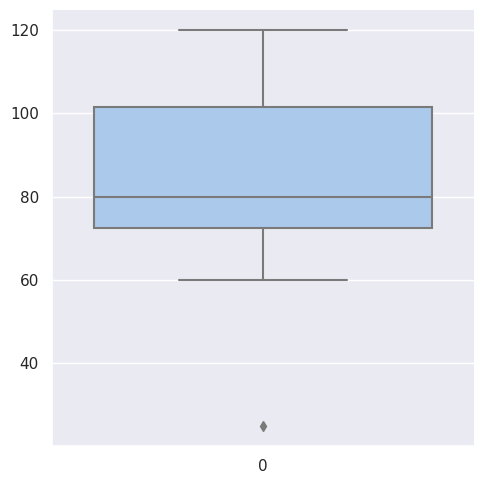

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x = [25, 60, 71, 73, 75, 79, 81, 85, 101, 103, 110, 120]
df = pd.DataFrame(x)
sns.set(style='darkgrid')
sns.catplot(data=df, kind ='box', palette='pastel')
plt.show()

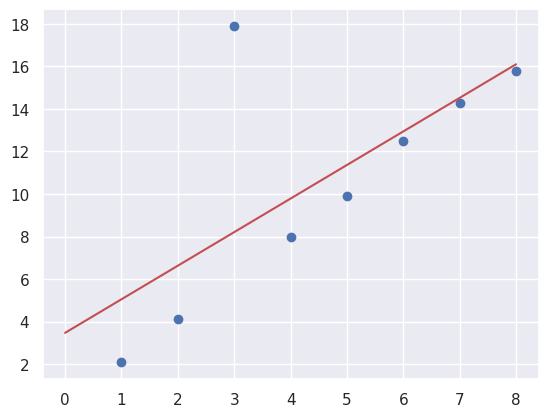

傾きは [1.57857143]
切片は 3.471428571428569
決定係数 R2 = 0.4770793650793651


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
# outlier の値を２通り試してみよう。
# outlier = 5.9
outlier = 17.9
#真の値　y = 2.0 * X に適当なノイズを加えてみたデータ
X = np.array([[1.0],[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[8.0]])
y = np.array([ 2.1, 4.1, outlier, 8.0, 9.9, 12.5, 14.3, 15.8])

model = LinearRegression()
model.fit(X, y)
X_line = np.linspace(0, 8, 100)
y_line = model.coef_[0] * X_line + model.intercept_    # y = ax+b
plt.plot(X_line, y_line, c = "r")
plt.scatter(X, y ,c = 'b')
plt.show()

print(f'傾きは {model.coef_}')
print(f'切片は {model.intercept_}')
print(f'決定係数 R2 = {model.score(X, y)}')

In [ ]:
import numpy as np
from scipy.spatial import distance

data_x = np.array([1, 1.2, 0.8, 3.5, 2.2, 0.5])

mu = np.mean(data_x)   # 平均値 μ を求める。
Sx = np.std(data_x)    # 標準偏差 Sx を求める。

# すべての点のマハラノビス距離リストを作る。
mahala_list = [abs(x - mu)/Sx for x in data_x]
#mahala_list = abs(data_x - mu)/Sx
# でも良いです。配列-スカラー　も計算してくれる親切なNumPyの補完機能です。
print(mahala_list)

[0.519930139081026, 0.3249563369256413, 0.7149039412364109, 1.917242387861284, 0.649912673851283, 1.0073646444694881]


In [ ]:
import numpy as np
from scipy.spatial import distance # scipy の distance をインポート。

vec_x = np.array([[6.4, 3.6],[9.4, 9.3],[5.2, 4.5],[9.4, 8.2],[7.2, 5.6],
                  [5.8, 6. ],[5. , 5.1],[4.4, 4.7],[3.6, 1.3],[2.8, 1.3],
                  [3.2, 0.4],[7.8, 7.1],[7. , 5.7],[5.6, 2.8],[7. , 5.4],
                  [6.8, 5.6],[6.4, 5.8],[6.6, 6.7],[6.4, 3.6],
                  [7.6, 6.5],[8.4, 8.2],[4.8, 4.3],[3.2, 1.9],[3.6, 3.4],
                  [7.6, 6.8],[5.4, 4.9],[3.8, 2.3],[4.4, 3.2],[6.4, 7.1],[4,9],[8, 9]])

vec_mu = np.mean(vec_x, axis=0) # 平均値のベクトルμを作る。
S = np.cov(vec_x.T)             # 分散共分散行列 S を作る。

# すべての点のマハラノビス距離リストを作る。
# 疑似逆行列を作るためにnp.linalg.pinvを利用している
mahala_list = [distance.mahalanobis(x, vec_mu, np.linalg.pinv(S)) for x in vec_x]
print(mahala_list)

[1.401654589950267, 1.9432376553432475, 0.3909297546504006, 1.9314366751991856, 0.9100388486664318, 0.6593477649962846, 0.7787914501923333, 1.1092758450447118, 1.6058265259106717, 1.7517653932460329, 1.986425619112528, 1.0298895354253408, 0.7012071394168651, 1.3747176854467023, 0.8267642684275125, 0.5715247908408062, 0.288171761851004, 0.6891578241379618, 1.401654589950267, 0.9531897731306112, 1.4006790442374528, 0.6363585678833351, 1.5097575212438776, 1.3259928078027874, 0.9218047595610074, 0.336543503433141, 1.2382372531088834, 0.8647472143219805, 1.0207765088880503, 4.05667228552758, 1.6285309256808151]
